# Aplicação da Transformada de Fourier Discreta

FFT - FAST FOURIER TRANSFORM

Domínio do tempo -> Domínio da frequência

## Pacote Python:

scipy.fft

[https://docs.scipy.org/doc/scipy/tutorial/fft.html](https://docs.scipy.org/doc/scipy/tutorial/fft.html)

Bibliografia:

Fujarra, A. L. C. (2009) "Dinâmica de Sistemas II - Material de Apoio" EPUSP, SP

## Exercício

Utilizar a FFT para gerar o espectro de energia $S_\zeta(\omega)$ de uma onda regular com amplitude $A=2 m$ e $T = 2s$.

## Passo 1 - Série Temporal

* $A_i$ - Amplitude da componente de onda $i$;
* $\omega_i$ - frequência angular da componente de onda $i$;
* $\psi_i$ - fase da componente de onda $i$;

$y(t) = \sum_{i=1}^{\infty} A_i \cdot \sin{(\omega_i t + \psi_i)}$

Lembrando que:

$\omega_i  = \dfrac{2 \pi}{T_i}$

Exemplo:

Onda regular: Uma única frequência e amplitude

* Amplitude: $A = 2$ m
* Período: $T = 2$ s
* Frequência: $f = \dfrac{1}{T} = 0.5$ Hz
* Frequência angular: $\omega = \dfrac{2 \pi}{2} = \pi$ rad/s

Equação: $y(t) = 2 \sin{\left(\pi t\right)}$

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [2]:
#Parâmetros da onda
N = 501       # N: quantidade de pontos na amostra
A = 2         # amplitude da onda em m
T = 2         # período de onda em s
N_ciclos = 10 # quantidade de ciclos

#vetor de tempo
t0 = 0
tf = N_ciclos * T
t = np.linspace(t0, tf, N)

#série temporal
w = 2*np.pi/T
y = A * np.sin(w * t)
# y = A * np.sin(w * t) + 2 * np.sin(2*np.pi/2 * t) + 2 * np.sin(2*np.pi/1 * t)

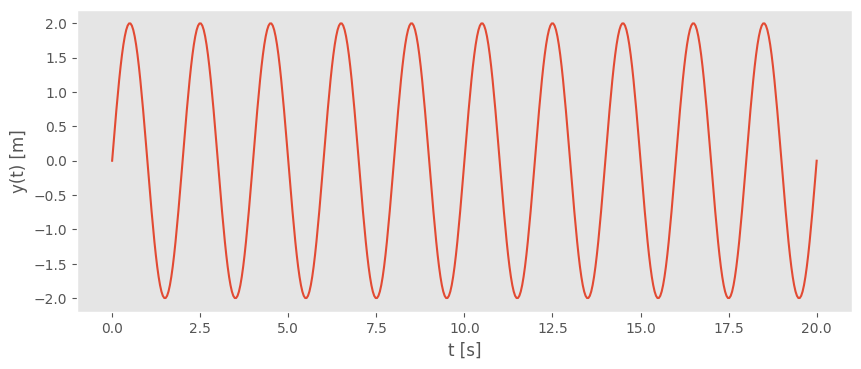

In [3]:
#visualização
plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(t, y, '-')
plt.grid()
plt.xlabel('t [s]')
plt.ylabel('y(t) [m]')
plt.show()



$\sigma$ - Desvio padrão do sinal

$A = \sqrt{2} \sigma$

In [4]:
A_ = np.sqrt(2) * np.std(y)
print(A_)

1.9980029950087344


## Passo 2 - Cálculo da FFT

$\Delta f = \dfrac{1}{t_f - t_0}$

In [5]:
from scipy.fft import fft

yf = fft(y) # resultado é um número complexo -> amplitude e fase das ondas
zeta_a = np.abs(yf)/N # A amplitude verdadeira deve ser obtida dividindo pelo número de pontos do sinal

# f = vetor de frequencias
Delta_f = 1/(tf-t0) # incremento de frequências
vetor_f = np.arange(N) * Delta_f
# print(Delta_f)
# print(f)

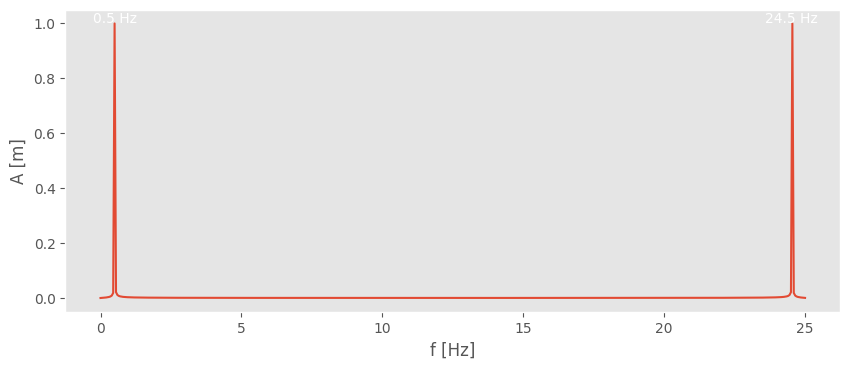

In [6]:
plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(vetor_f, zeta_a)

plt.xlabel('f [Hz]')
plt.ylabel('A [m]')
plt.text(1/T, A/2, str(1/T)+' Hz', horizontalalignment='center')
plt.text(vetor_f[-1] - 1/T, A/2, str(vetor_f[-1] - 1/T) +' Hz', horizontalalignment='center')

plt.grid()
plt.show()

## Passo 3 - Remoção das frequências de Aliasing

Frequência de Amostragem

$f_S = (N-1) \cdot \Delta f$

Frequência de Aliasing

$f_A = f_S - f$

In [7]:
fs = (N-1) * Delta_f
fs

25.0

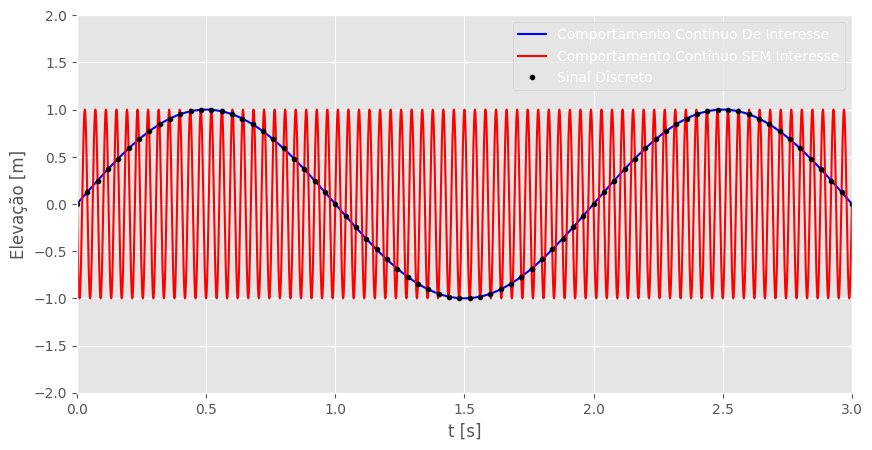

In [8]:
# Frequências de Aliasing
t_continuo = np.linspace(t0,tf,N*100)

w_interesse = 2*np.pi*1/T
el_interesse = A/2*np.sin(w_interesse * t_continuo)

w_aliasing = 2*np.pi*(fs-1/T)
el_aliasing  = -A/2*np.sin(w_aliasing * t_continuo)

plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(t_continuo,el_interesse,'b', label='Comportamento Contínuo De Interesse')

plt.plot(t_continuo,el_aliasing,'r', label='Comportamento Contínuo SEM Interesse')


plt.plot(t, y/2, 'k.', label='Sinal Discreto')

plt.xlabel('t [s]')
plt.ylabel('Elevação [m]')
plt.xlim((0,3))
plt.ylim((-2, 2))
plt.legend()
plt.show()

Frequência de corte:

$f_c = \dfrac{f_S}{2}$

* O vetor de amplitudes e frequências deve ser cortado ao meio
* A amplitude deve ser multiplicada por 2
* Deve-se garantir que a frequência de amostragem seja no mínimo 2 vezes o valor da frequência de interesse

No presente caso a frequência de interesse é 0.5 Hz, logo é necessário uma amostragem de no mínimo 1 Hz (na prática adota-se valores bem maiores 10x, 100x)

In [9]:
N//2

250

In [10]:
zeta_a = 2*zeta_a[0:N//2]

vetor_f = vetor_f[0:N//2]

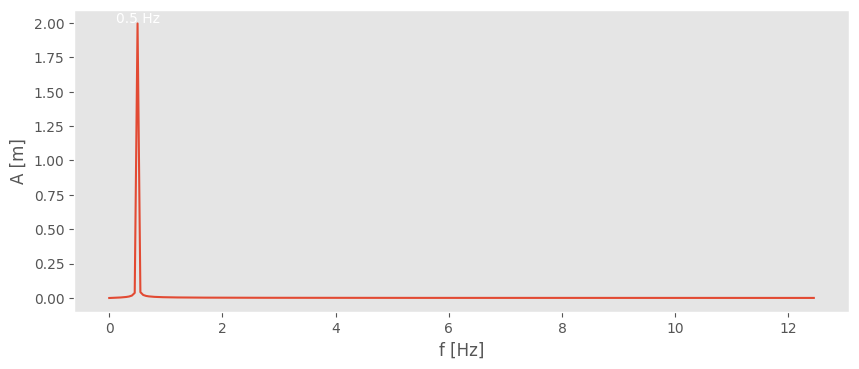

In [11]:
plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(vetor_f, zeta_a)
plt.xlabel('f [Hz]')
plt.ylabel('A [m]')
plt.text(1/T,A,str(1/T)+' Hz', horizontalalignment='center')
plt.grid()
plt.show()

## Passo 4 - Cálculo do espectro de energia

$S_{\zeta}(f) = \dfrac{[\zeta_a]^2}{2 \cdot \Delta f}$ $[m^2 s]$

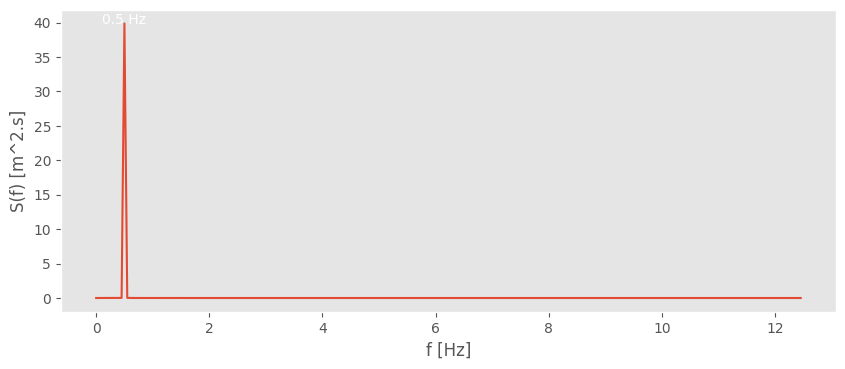

In [12]:
Sf = (zeta_a**2)/(2*Delta_f)

plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(vetor_f, Sf)
plt.xlabel('f [Hz]')
plt.ylabel('S(f) [m^2.s]')
plt.text(1/T,np.max(Sf),str(1/T)+' Hz', horizontalalignment='center')
plt.grid()

$A = \sqrt{2} \sigma$

$\sigma^2 = \int_0^\infty S_\zeta(f) df = m_0 $

In [13]:
m0 = np.trapz(Sf, vetor_f)

Desvio_padrao = np.sqrt(m0)

A = np.sqrt(2) * Desvio_padrao

print(A)

1.9980029002914463


### Espectro de Energia - Frequência Angular

$S_\zeta (\omega) \Delta \omega = S_\zeta(f) \Delta f $

$\Delta \omega = 2 \pi \Delta f$

$S_\zeta (\omega)  = \dfrac{S_\zeta(f)}{2 \pi} $

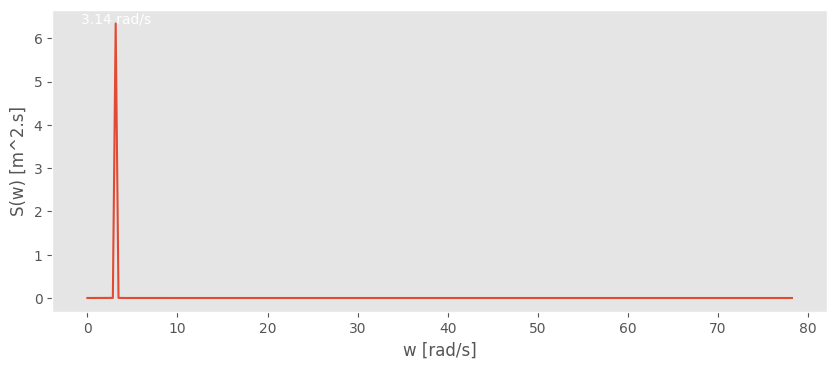

In [14]:
Delta_w = 2*np.pi*Delta_f
vetor_w = 2*np.pi*vetor_f

Sw = Sf/(2*np.pi)

plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(vetor_w,Sw)
plt.xlabel('w [rad/s]')
plt.ylabel('S(w) [m^2.s]')
plt.text(w,np.max(Sw),'{:.2f}'.format(w) +' rad/s', horizontalalignment='center')
plt.grid()
plt.show()

$A = \sqrt{2} \sigma$

$\sigma^2 = \int_0^\infty S_\zeta(\omega) d\omega = m_0 $

In [15]:
m0_w = np.trapz(Sw, vetor_w)

Desvio_padrao_w = np.sqrt(m0_w)

A_w = np.sqrt(2) * Desvio_padrao_w

print(A_w)

1.9980029002914468
